In [1]:
from mlchecks.base import Dataset
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
from mlchecks.checks import TrainValidationDifferenceOverfit
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
clf = AdaBoostClassifier()
frame = iris.frame
X = iris.data
Y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
            X, Y, test_size=0.33, random_state=42)
train_ds = Dataset(pd.concat([X_train, y_train], axis=1), 
            features=iris.feature_names,
            label='target')
val_ds = Dataset(pd.concat([X_test, y_test], axis=1), 
            features=iris.feature_names,
            label='target')
clf.fit(X_train, y_train)

AdaBoostClassifier()

## Performance drop

Train Validation Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on validation data.

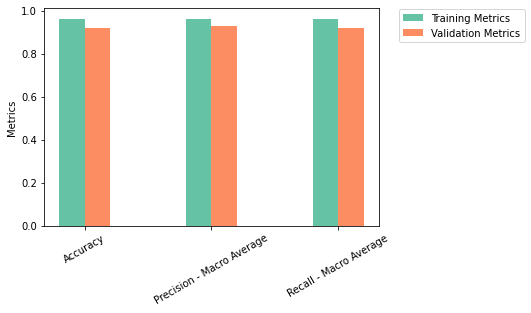

In [4]:
TrainValidationDifferenceOverfit().run(train_ds, val_ds, clf)

## Alternative metric list

In [5]:
from sklearn.metrics import make_scorer

Train Validation Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on validation data.

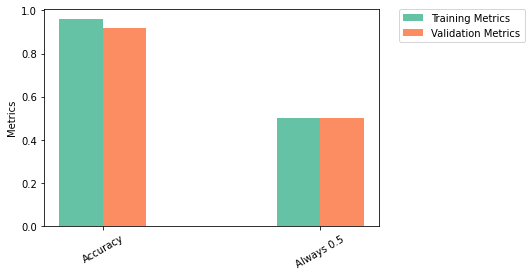

In [6]:
TrainValidationDifferenceOverfit(alternative_metrics={'Accuracy': 'accuracy', 'Always 0.5': lambda x,y,z: 0.5}).run(train_ds, val_ds, clf)

Train Validation Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on validation data.

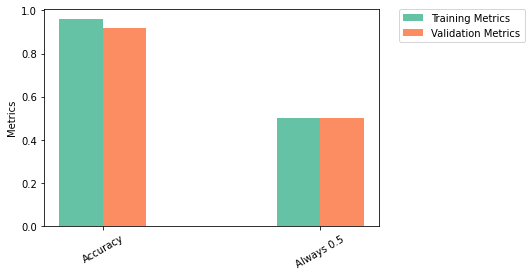

In [7]:
obj = TrainValidationDifferenceOverfit(alternative_metrics={'Accuracy': 'accuracy', 'Always 0.5': lambda x,y,z: 0.5})
obj.run(train_ds, val_ds, clf)

## no drop

Train Validation Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on validation data.

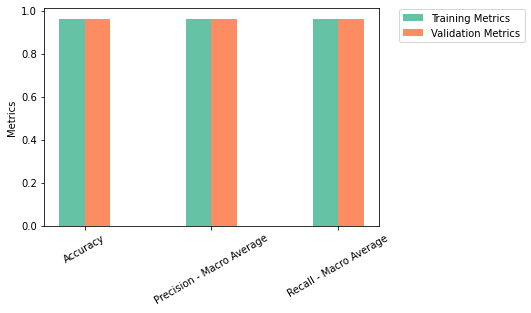

In [8]:
TrainValidationDifferenceOverfit().run(train_ds, train_ds, clf)